In [1]:
import sys

sys.path.append('../../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.neuralNetwork.function import SigmoidFunction
from src.neuralNetwork.NeuralNetwork import NeuralNetwork, Layer
from matplotlib import pyplot as plt
from src.load_ds import load_monks
from src.neuralNetwork.error import MeanSquaredError
import numpy as np

# Monk 1
(100% accuracy sul test set)

In [2]:
layer1 = Layer(num_neurons = 4, num_inputs = 17, activation_function = SigmoidFunction())
layer2 = Layer(num_neurons = 1, num_inputs = 4, activation_function = SigmoidFunction())
neuralNetwork_Monk1 = NeuralNetwork([layer1, layer2])

learning_rate_Monk1 = 0.075
regularization_term_Monk1 = 0
momentum_term_Monk1 = 0.5
epochs_Monk1 = 800

target_inputs_train_Monk1, target_outputs_train_Monk1 = load_monks('../datasets/monk/monks-1.train', shuffle=False)
target_inputs_test_Monk1, target_outputs_test_Monk1 = load_monks('../datasets/monk/monks-1.test', shuffle=False)

# Monk 2
(100% accuracy sul test set)

In [3]:
layer1 = Layer(num_neurons = 2, num_inputs = 17, activation_function = SigmoidFunction())
layer2 = Layer(num_neurons = 1, num_inputs = 2, activation_function = SigmoidFunction())
neuralNetwork_Monk2 = NeuralNetwork([layer1, layer2])

learning_rate_Monk2 = 0.1
regularization_term_Monk2 = 0
momentum_term_Monk2 = 0.9
epochs_Monk2=200

target_inputs_train_Monk2, target_outputs_train_Monk2 = load_monks('../datasets/monk/monks-2.train', shuffle=False)
target_inputs_test_Monk2, target_outputs_test_Monk2 = load_monks('../datasets/monk/monks-2.test', shuffle=False)

# Monk 3
(97.3% accuracy sul test set)

In [4]:
layer1 = Layer(num_neurons = 2, num_inputs = 17, activation_function = SigmoidFunction())
layer2 = Layer(num_neurons = 1, num_inputs = 2, activation_function = SigmoidFunction())
neuralNetwork_Monk3 = NeuralNetwork([layer1, layer2])

learning_rate_Monk3 = 0.1
regularization_term_Monk3 = 0.01
momentum_term_Monk3 = 0.9
epochs_Monk3=500


target_inputs_train_Monk3, target_outputs_train_Monk3 = load_monks('../datasets/monk/monks-3.train', shuffle=False)
target_inputs_test_Monk3, target_outputs_test_Monk3 = load_monks('../datasets/monk/monks-3.test', shuffle=False)

# Training

In [5]:
# Scelta modello
neuralNetwork = neuralNetwork_Monk2
learning_rate = learning_rate_Monk2
regularization_term = regularization_term_Monk2
momentum_term = momentum_term_Monk2
epochs = epochs_Monk2
target_inputs_train, target_outputs_train = target_inputs_train_Monk2, target_outputs_train_Monk2
target_inputs_test, target_outputs_test = target_inputs_test_Monk2, target_outputs_test_Monk2

In [6]:
def get_accuracy(neuralNetwork, target_inputs, target_outputs):
    output_nn = neuralNetwork.predict(target_inputs)

    output_nn = np.matrix(np.where(output_nn >= 0.5, 1, output_nn))
    output_nn = np.matrix(np.where(output_nn < 0.5, 0, output_nn))
    incorrect_prediction = np.sum(np.abs(target_outputs - output_nn))

    accuracy = (1- incorrect_prediction / target_outputs.shape[0])*100
    return accuracy

In [7]:
error_list_training = []
error_list_test = []

accuracy_list_training = []
accuracy_list_test = []

for _ in range(epochs):
    error_test = neuralNetwork.train(target_inputs_training=target_inputs_train,
                                     target_outputs_training=target_outputs_train,
                                     learning_rate = learning_rate,
                                     regularization_term = regularization_term,
                                     momentum_term = momentum_term, epochs=1)
    error_list_training.append(error_test[0])

    output_nn_test = neuralNetwork.predict(target_inputs_test)
    error_test = MeanSquaredError().calculate_total_error(target_output=target_outputs_test, output_nn=output_nn_test)
    error_list_test.append(error_test)

    # accuracy test
    accuracy_test = get_accuracy(neuralNetwork, target_inputs=target_inputs_test, target_outputs=target_outputs_test)
    accuracy_list_test.append(accuracy_test)

    # accuracy training
    accuracy_training = get_accuracy(neuralNetwork, target_inputs=target_inputs_train, target_outputs=target_outputs_train)
    accuracy_list_training.append(accuracy_training)

Epoch 0/1: Training error: 0.24940444649731142
Epoch 0/1: Training error: 0.2397991239374768
Epoch 0/1: Training error: 0.2452617274736507
Epoch 0/1: Training error: 0.2361804282543614
Epoch 0/1: Training error: 0.23686102366781353
Epoch 0/1: Training error: 0.23633331365160598
Epoch 0/1: Training error: 0.23483919002743803
Epoch 0/1: Training error: 0.23508338173962345
Epoch 0/1: Training error: 0.23456536017524737
Epoch 0/1: Training error: 0.234388826731933
Epoch 0/1: Training error: 0.2342277155925654
Epoch 0/1: Training error: 0.23389609164851777
Epoch 0/1: Training error: 0.23369929138760132
Epoch 0/1: Training error: 0.23342096493704204
Epoch 0/1: Training error: 0.23306669642529934
Epoch 0/1: Training error: 0.23272470456584254
Epoch 0/1: Training error: 0.23233368395525567
Epoch 0/1: Training error: 0.2318766208356931
Epoch 0/1: Training error: 0.2313922432056241
Epoch 0/1: Training error: 0.23087327036711225
Epoch 0/1: Training error: 0.23030581008601553
Epoch 0/1: Training e

### ERROR plot

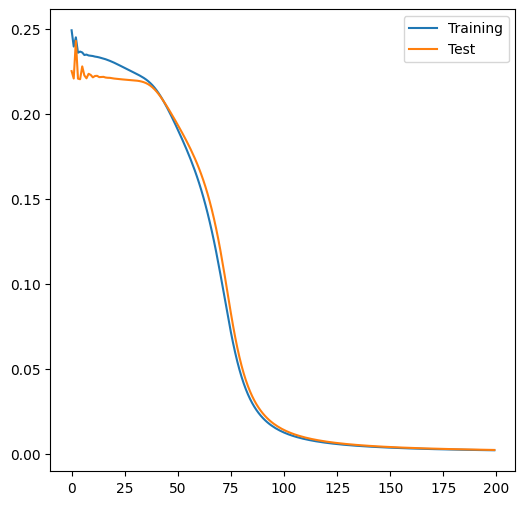

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(error_list_training, label=f"Training")
plt.plot(error_list_test, label=f"Test")
plt.legend()
plt.show()

### Accuracy plot

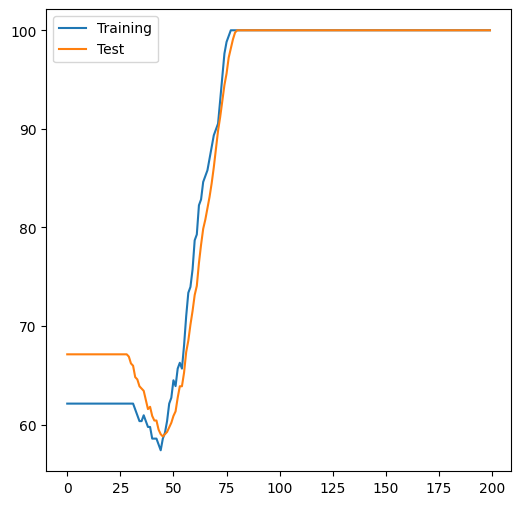

In [9]:
plt.figure(figsize=(6, 6))
plt.plot(accuracy_list_training, label=f"Training")
plt.plot(accuracy_list_test, label=f"Test")
plt.legend()
plt.show()

In [10]:
accuracy_list_test[-1]

100.0

In [11]:
accuracy_list_training[-1]

100.0